In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
data=pd.read_csv(r"H:\Maha Laptop Disk D\DS291022B\DSA_advanced\house_rental_data.csv.txt")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.corr()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,1.000000,-0.065182,-0.021299,-0.039687,-0.008638,-0.027035,-0.007877,-0.077512
Sqft,-0.065182,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,-0.021299,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,-0.039687,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,-0.008638,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,-0.027035,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,-0.007877,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,-0.077512,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [4]:
data.shape

(645, 8)

In [5]:

data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [6]:
data.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [7]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
x=np.array(data[["Sqft","Floor","TotalFloor","Bedroom","Living.Room","Bathroom"]])
y=np.array(data[["Price"]])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)
print(f"Train:{x_train.shape},{y_train.shape}")
print(f"Test: {x_test.shape},{y_test.shape}")

Train:(516, 6),(516, 1)
Test: (129, 6),(129, 1)


In [10]:
from sklearn import preprocessing
x_train_norm=preprocessing.normalize(x_train)
x_test_norm=preprocessing.normalize(x_test)

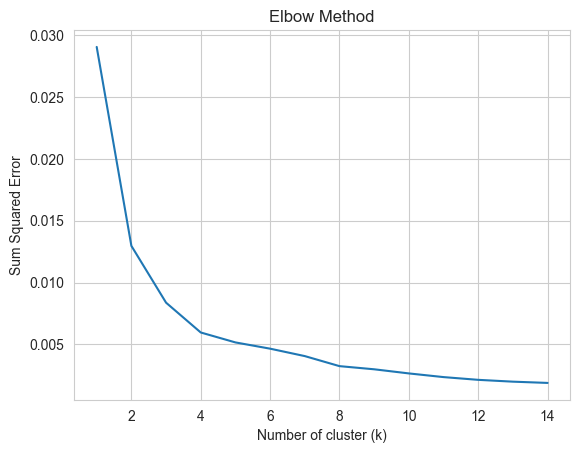

In [11]:
from sklearn.cluster import KMeans
import seaborn as sns
sse=[]
for k in range (1,15):
    kmeans=KMeans(n_clusters=k,random_state=2, n_init='auto')
    kmeans.fit(x_train_norm)
    sse.append(kmeans.inertia_)
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,15), y=sse)
  
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
  
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, 
               input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=21)

Epoch 1/21
516/516 [==============================] - 18s 13ms/step - loss: 5430693376.0000
Epoch 2/21
516/516 [==============================] - 6s 12ms/step - loss: 5224441856.0000
Epoch 3/21
516/516 [==============================] - 6s 12ms/step - loss: 4869605376.0000
Epoch 4/21
516/516 [==============================] - 7s 13ms/step - loss: 4420978176.0000
Epoch 5/21
516/516 [==============================] - 6s 12ms/step - loss: 3937912832.0000
Epoch 6/21
516/516 [==============================] - 6s 12ms/step - loss: 3452209664.0000
Epoch 7/21
516/516 [==============================] - 6s 13ms/step - loss: 2997565440.0000
Epoch 8/21
516/516 [==============================] - 6s 12ms/step - loss: 2600006400.0000
Epoch 9/21
516/516 [==============================] - 6s 12ms/step - loss: 2268734976.0000
Epoch 10/21
516/516 [==============================] - 6s 12ms/step - loss: 2008185856.0000
Epoch 11/21
516/516 [==============================] - 7s 14ms/step - loss: 1813494784.0

In [14]:
# print("Enter House Details to Predict Rent")
# a = int(input("Preferred Sqft.: "))
# b = int(input("Preferred floor: "))
# c = int(input("Total floor: "))
# d = int(input("Number of Bedrooms "))
# e = int(input("Number of Living Room: "))
# f = int(input("Number of Bathrooms: "))
# features = np.array([[a, b, c, d, e, f]])
# print("Predicted House Price = ", model.predict(features))

In [21]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(x_train_norm)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [22]:
kmeans.cluster_centers_

array([[0.99996848, 0.00312384, 0.00607331, 0.00194924, 0.00121602,
        0.00120402],
       [0.99928566, 0.02069287, 0.02958352, 0.00252785, 0.00218257,
        0.00214149],
       [0.99983769, 0.00844705, 0.01475949, 0.00223186, 0.00181884,
        0.00151088]])

In [23]:
pred = kmeans.fit_predict(x_train_norm)
pred

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,

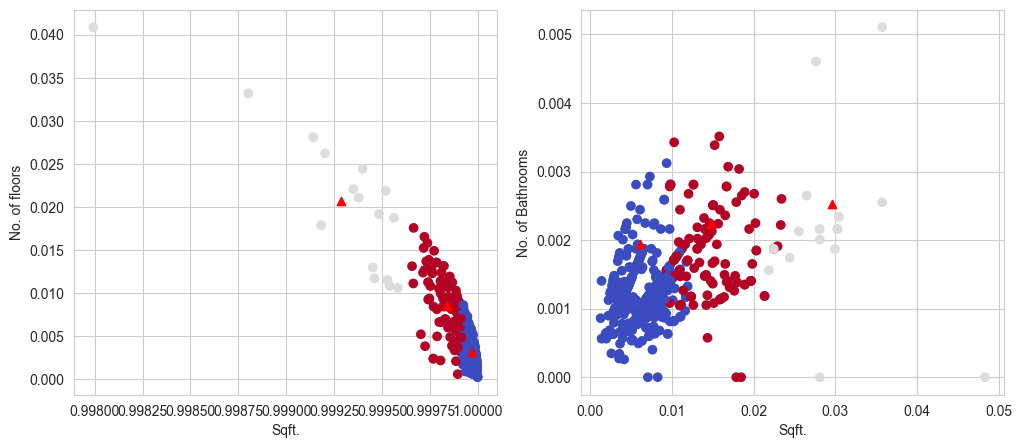

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_train_norm[:,0],x_train_norm[:,1],c = pred, cmap='coolwarm')
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("Sqft.")
plt.ylabel("No. of floors")
      
plt.subplot(1,2,2)   
plt.scatter(x_train_norm[:,-4],x_train_norm[:,4],c = pred, cmap='coolwarm')
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("Sqft.")
plt.ylabel("No. of Bathrooms")
plt.show()